# Recordatorio

Las tareas dividas para esta programación es la siguiente:

- Jorge Bósquez:   
Generación de una función capaz de generar los rangos de tiempo adecuados para la simulación, considerando el ingreso de un día cualquiera y un rango en específico.  
Generación de una función capaz de graficar la trayectoria 2D de los ángulos azimuth y elevation con respecto al tiempo para el rango dado en el caso anterior.   
Generación de una función capaz de graficar la trayectoria 3D del sol, haciendo uso de los ángulos azimuth y elevation con respecto al tiempo, esta función debe ser simulada en tiempo real en el rango de tiempo dado al inicio.

- Mark Hernández:  
Generación de una función capaz de calcular los ángulos de roll y pitch a partir del los valores obtenidos para el azimuth y elevation en un día cualquiera y para un rango cualquiera.
Generación de una función que permita verificar que el panel está orientado perpendicularmente a los rayos del sol.

- Kevin Paillacho:  
Generación de una función capaz de graficar la trayectoria 2D de los ángulos roll y pitch con respecto al tiempo. Los valores de lso ángulos se encuentran en la lista solución, se debe sacar esos datos para graficarlos.   
Generación de una función capaz de graficar la trayectoria 3D del panel solar, haciendo uso de los ángulos roll y pitch con respecto al tiempo, esta función debe ser simulada en tiempo real y haciendo uso de representación adecuada.  

- Luis Pérez:  
Generación de una interfaz capaz de interactuar con el usuario, permitiendole ingresar una fecha, un intervalo de tiempo en el que desee hacer la prueba y controlar horarios, como que no ingresen un intervalo de noche, el rango adecuado de tiempo es de 6:00 a 18:00, luego de eso ya no tiene sentido el prolema.  
Juntar las gráficas interactivas con la interfaz y verificar su correcto funcionamiento.

## Código proporcionado por el profe

In [8]:
from pysolar.solar import get_altitude, get_azimuth
from datetime import datetime, timedelta
from pytz import timezone


def getSolarPosition(
    latitude: float = -0.2105367,
    longitude: float = -78.491614,
    date: datetime = datetime.now(tz=timezone("America/Guayaquil")),
):
    """Calcula el ``azimuth`` y la ``elevation`` para una posición geográfica (por defecto la EPN) y la fecha ``date``.

    ## Parameters

    ## Return
    ``azimuth``: ángulo en grados desde el norte hasta la projección en la tierra [0 -> 360).
    ``elevation``: ángulo del sol hacia la proyección en la tierra [-90 -> 90].

    """

    az = get_azimuth(latitude, longitude, date)
    el = get_altitude(latitude, longitude, date)

    return az, el

### intento de obtener un rango para verifación de valores

Es necesario implementar una función que haga un recorrido en un intervalo de tiempo dado, en un día dado, y que recorra de ser posible cada 5 minutos o cada minuto.

In [9]:
# Fecha específica: 10 de enero de 2023
start_date = datetime(2023, 1, 10, 6, 0, tzinfo=timezone("America/Guayaquil"))

# Intervalo de tiempo (una hora)
time_interval = timedelta(hours=1)

# Lista para almacenar los resultados
solar_positions = []
angulos = []

# Iterar sobre 24 horas
for i in range(13):
    current_time = start_date + i * time_interval
    azimuth, elevation = getSolarPosition(date=current_time)
    solar_positions.append((current_time, azimuth, elevation))
    angulos.append((azimuth,elevation))

# Imprimir los resultados
for time, az, el in solar_positions:
    print(f"Time: {time}, Azimuth: {az}, Elevation: {el}")

Time: 2023-01-10 06:00:00-05:19, Azimuth: 111.96060181265568, Elevation: 0.0895346619390035
Time: 2023-01-10 07:00:00-05:19, Azimuth: 112.54853333810631, Elevation: 13.501249056124564
Time: 2023-01-10 08:00:00-05:19, Azimuth: 114.72479304265339, Elevation: 27.220155721818536
Time: 2023-01-10 09:00:00-05:19, Azimuth: 119.2603809091126, Elevation: 40.59794202587863
Time: 2023-01-10 10:00:00-05:19, Azimuth: 128.13117085202637, Elevation: 53.13020136868613
Time: 2023-01-10 11:00:00-05:19, Azimuth: 146.02670274194577, Elevation: 63.50029510473658
Time: 2023-01-10 12:00:00-05:19, Azimuth: 178.49623471262203, Elevation: 68.28884415715805
Time: 2023-01-10 13:00:00-05:19, Azimuth: 211.94676523002377, Elevation: 64.16293709619201
Time: 2023-01-10 14:00:00-05:19, Azimuth: 230.8936671504981, Elevation: 54.080534171471655
Time: 2023-01-10 15:00:00-05:19, Azimuth: 240.27567541223962, Elevation: 41.65431114664586
Time: 2023-01-10 16:00:00-05:19, Azimuth: 245.07031292310296, Elevation: 28.317685967055

### Modelo de graficación de la trayectoria del sol

Aqui se muestra la trayectoria 2D de los ángulos azimuth y elevation. Intentar modificarle para que se genere el gráfico de manera interactiva, es decir, que con la función anterior a medida que sca los valores también grafique su trayectoria para un intervalo de tiempo determinado. y ver si se puede acelerar el tiempo de ejecución de esa simulación. 

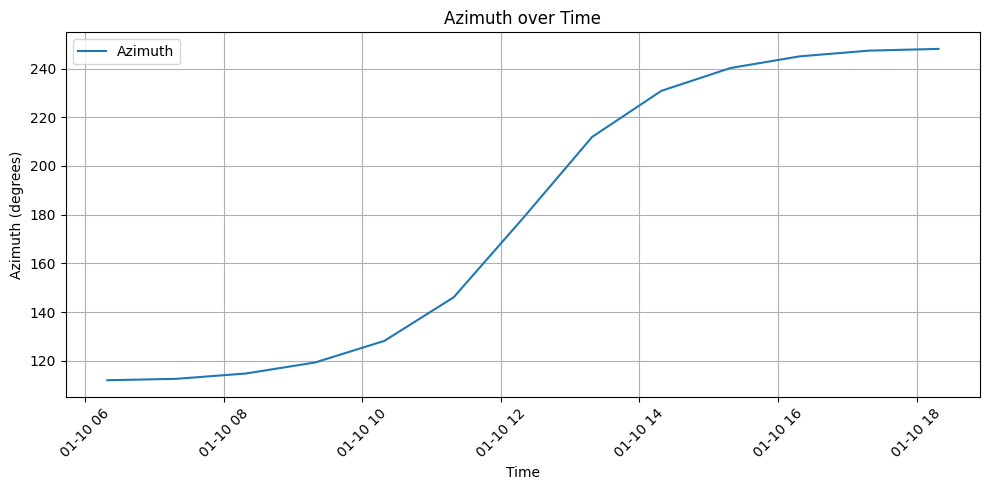

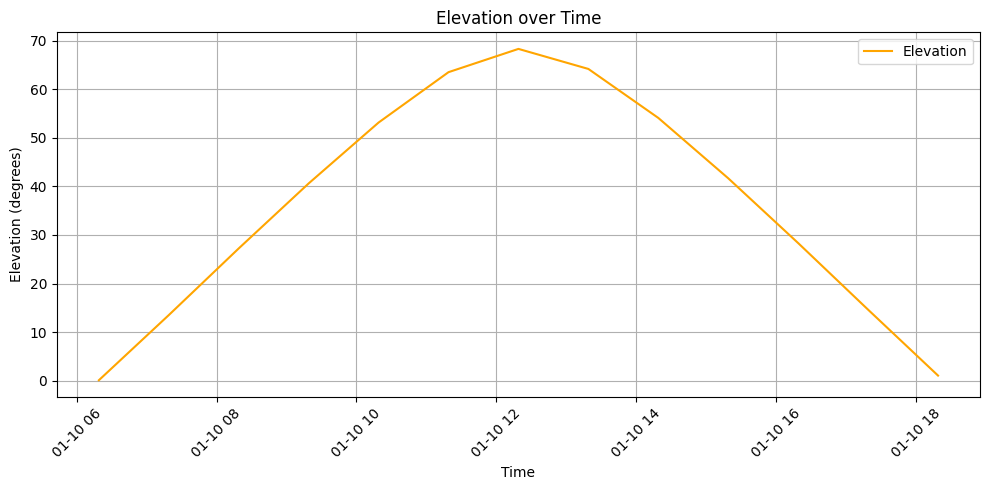

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extraer los datos de tiempo, azimuth y elevación
times = [pos[0] for pos in solar_positions]
azimuths = [pos[1] for pos in solar_positions]
elevations = [pos[2] for pos in solar_positions]

# Graficar Azimuth
plt.figure(figsize=(10, 5))
plt.plot(times, azimuths, label='Azimuth')
plt.xlabel('Time')
plt.ylabel('Azimuth (degrees)')
plt.title('Azimuth over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Graficar Elevation
plt.figure(figsize=(10, 5))
plt.plot(times, elevations, label='Elevation', color='orange')
plt.xlabel('Time')
plt.ylabel('Elevation (degrees)')
plt.title('Elevation over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Ejemplo de gráfica 3D 

Mejorar la presentación para que se vea bien la forma de la parábola y se entienda como se mueve a traves del tiempo, si pueden hacerle una simulación en tiempo real es mejor.

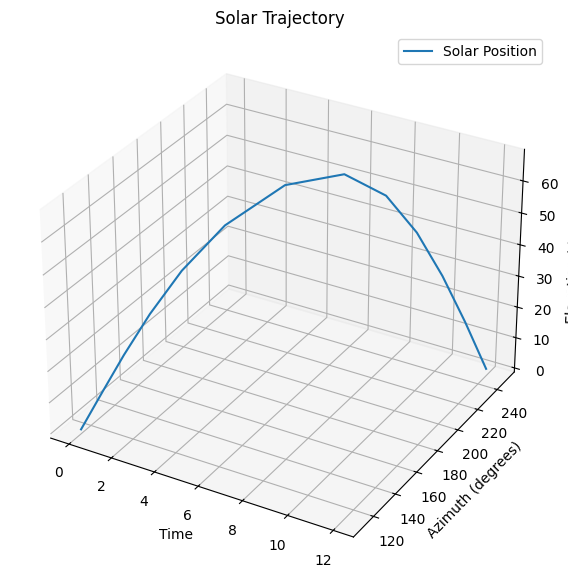

In [11]:
import numpy as np

# Crear la figura 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Convertir los tiempos a números (por simplicidad en la gráfica 3D)
time_numbers = np.arange(len(times))

# Graficar los datos en 3D
ax.plot(time_numbers, azimuths, elevations, label='Solar Position')

ax.set_xlabel('Time')
ax.set_ylabel('Azimuth (degrees)')
ax.set_zlabel('Elevation (degrees)')
ax.set_title('Solar Trajectory')
ax.legend()
plt.show()


### Cálculo de los ángulos beta (roll) y phi(pitch)

se calcula los ángulos en base al primer ejemplo de rotación. Toca crear una función adecuada que haga esto por detrás para poder realizar las gráficas de manera sencilla.

In [12]:
solucion = []

for az, el in angulos:
    az = (az*np.pi)/180
    el = (el*np.pi)/180
    val = np.cos(el)*np.sin(az)
    beta_rad = np.arcsin(val)
    beta_deg = (beta_rad*180)/np.pi
    val_fi1 = -(np.cos(el)*np.cos(az))/(np.cos(beta_rad))
    x = np.arcsin(val_fi1)
    x_deg = (x*180)/np.pi
    val_fi2 = np.sin(el)/np.cos(beta_rad)
    y = np.arccos(val_fi2)
    y_deg = (y*180)/np.pi
    solucion.append((beta_deg,x_deg))
    print(f"roll: {beta_deg}, pitch_1: {x_deg}, pitch_2: {y_deg}")

roll: 68.03922469556383, pitch_1: 89.76058382824651, pitch_2: 89.76058382824142
roll: 63.90063390840235, pitch_1: 57.94783345719024, pitch_2: 57.94783345719017
roll: 53.87522533823372, pitch_1: 39.116027079964844, pitch_2: 39.11602707996486
roll: 41.48426562426454, pitch_1: 29.6965472968021, pitch_2: 29.6965472968021
roll: 28.161498564805612, pitch_1: 24.848678127076692, pitch_2: 24.84867812707669
roll: 14.438202792918558, pitch_1: 22.463501479373587, pitch_2: 22.463501479373576
roll: 0.5562292457032463, pitch_1: 21.70437374817491, pitch_2: 21.704373748174913
roll: -13.332541331430399, pitch_1: 22.33666678568742, pitch_2: 22.33666678568741
roll: -27.079399834623676, pitch_1: 24.55669909238774, pitch_2: 24.55669909238772
roll: -40.45546556750176, pitch_1: 29.135239882230692, pitch_2: 29.13523988223067
roll: -52.96871483428176, pitch_1: 38.034029702309645, pitch_2: 38.03402970230964
roll: -63.30309220214942, pitch_1: 55.84525924468949, pitch_2: 55.84525924468952
roll: -68.09450951023446,

### Ejemplo de graficación 2D de los ángulos de roll y pitch calculados anteriormente

Tratar de trabajar las mismas estructuras y crear un método que reciba las listas solar_positions y solucion. Igual que arriba intentar que la graficación se de a manera de simulación, es decir, en tiempo real.

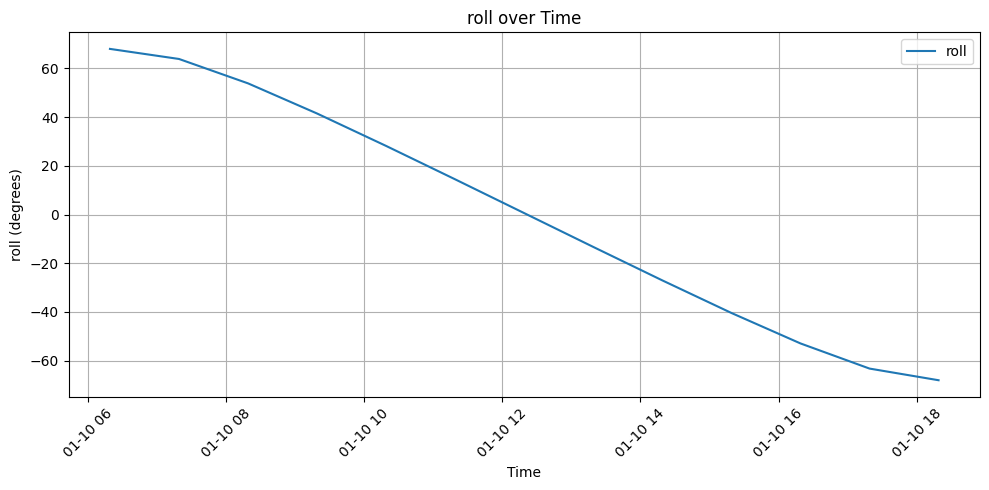

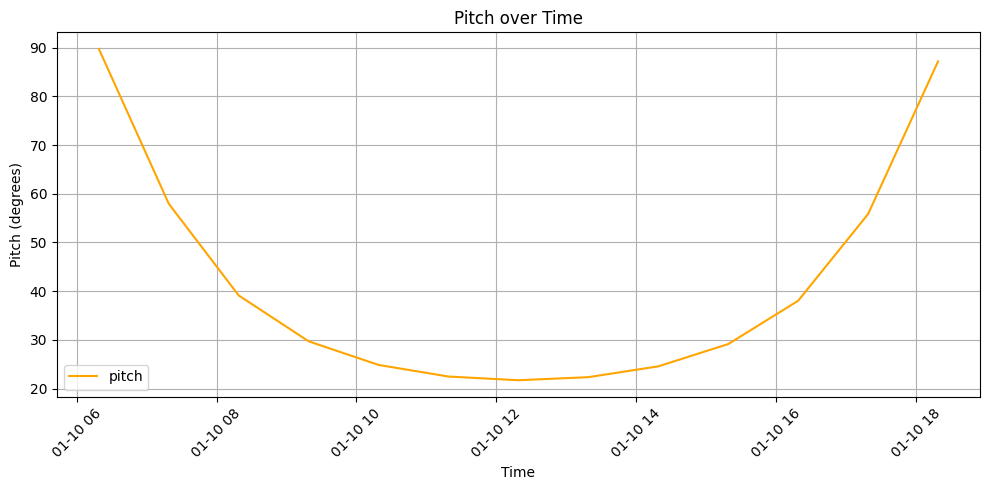

In [13]:
# Extraer los datos de tiempo, azimuth y elevación
times = [pos[0] for pos in solar_positions]
beta = [sol[0] for sol in solucion]
phi = [sol[1] for sol in solucion]

# Graficar Azimuth
plt.figure(figsize=(10, 5))
plt.plot(times, beta, label='roll')
plt.xlabel('Time')
plt.ylabel('roll (degrees)')
plt.title('roll over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Graficar Elevation
plt.figure(figsize=(10, 5))
plt.plot(times, phi, label='pitch', color='orange')
plt.xlabel('Time')
plt.ylabel('Pitch (degrees)')
plt.title('Pitch over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Ejemplo de graficación 3D del panel solar

Intentar que la gráfica se genere en tiempo real, e igual que arriba mejorar su presentación para poder contemplar y explicar de mejor manera los resultados.

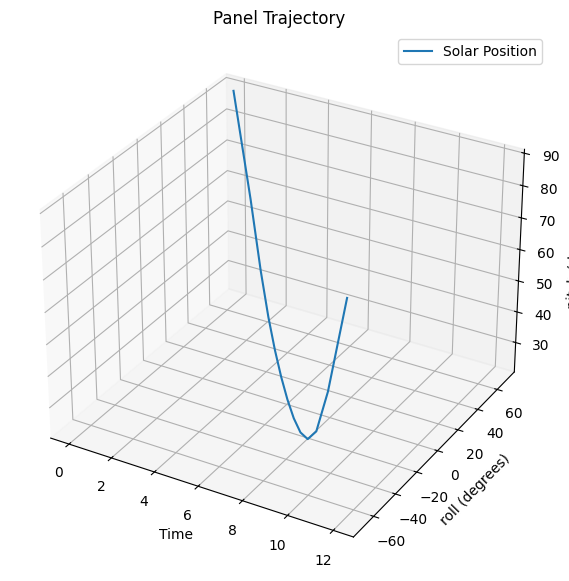

In [14]:
# Crear la figura 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Convertir los tiempos a números (por simplicidad en la gráfica 3D)
time_numbers = np.arange(len(times))

# Graficar los datos en 3D
ax.plot(time_numbers, beta, phi, label='Solar Position')

ax.set_xlabel('Time')
ax.set_ylabel('roll (degrees)')
ax.set_zlabel('pitch (degrees)')
ax.set_title('Panel Trajectory')
ax.legend()
plt.show()